# Popular Data Science Questions Project

This project is dedicated to the [**Data Science Stack Exchange**](https://datascience.stackexchange.com/) (DSSE) website. We will use this resource in order to understand what content a data science education company should create.

## Stack Exchange

DSSE is a place where we can ask questions about data science. In case some advice needed this is a good place to go to. The [home page](https://datascience.stackexchange.com/) has 4 sections:
  *  [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
  *  [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);
  *  [Users](https://datascience.stackexchange.com/users) — a list of users;
  *  [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions

## Stack Exchange Data Explorer

Stack Exchange provides a public data base for each of its websites. We can access data writing queries [here](https://data.stackexchange.com/datascience/query/new). Let's get the list of top 10 tags on DSSE. We can write a query for that using the link above: 

SELECT TOP 10 *
  FROM tags
 ORDER BY Count DESC;
 
Then we save the query and open it here. 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
tags = pd.read_csv("QueryResults.csv", delimiter=",")
tags

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,2,machine-learning,7770,4909,4908
1,46,python,4503,5523,5522
2,81,neural-network,3249,8885,8884
3,194,deep-learning,3164,8956,8955
4,77,classification,2114,4911,4910
5,324,keras,2012,9251,9250
6,128,scikit-learn,1492,5896,5895
7,321,tensorflow,1443,9183,9182
8,47,nlp,1355,147,146
9,24,r,1205,49,48


## Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

  *  Id: An identification number for the post.
  *  PostTypeId: An identification number for the type of post.
  *  CreationDate: The date and time of creation of the post.
  *  Score: The post's score.
  *  ViewCount: How many times the post was viewed.
  *  Tags: What tags were used.
  *  AnswerCount: How many answers the question got (only applicable to question posts).
  *  FavoriteCount: How many times the question was favored (only applicable to question posts).
  
Once again we can write a query to get the data we need. Our query will look like this:

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 
We should open it here the same way as the previous one above.

In [16]:
posts = pd.read_csv("QueryResults2.csv")
posts.head(11)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,45314,2019-02-09 18:24:50,6,78766,<python><pandas>,3,3.0
1,48049,2019-03-26 17:18:06,7,56468,<python><dataframe><csv><data-formats>,2,2.0
2,45165,2019-02-06 13:29:24,25,50361,<machine-learning><neural-network><deep-learni...,4,6.0
3,56668,2019-07-31 10:08:51,6,38660,<data-mining><pandas>,3,NaN
4,54214,2019-06-21 11:48:16,2,28969,<scikit-learn><pandas><numpy>,2,NaN
5,53048,2019-06-01 14:23:37,6,21894,<machine-learning><python>,1,NaN
6,46437,2019-03-01 05:23:54,4,21404,<pandas><dataframe><excel><data.table>,3,NaN
7,44871,2019-01-31 15:57:53,0,20309,<python><computer-vision><opencv>,2,NaN
8,58546,2019-09-02 12:07:54,0,18037,<python><pandas><dataframe>,1,NaN
9,47405,2019-03-16 10:25:11,13,16687,<keras><epochs>,4,1.0


## Exploring the Data

We can read in the data while immediately making sure CreationDate will be stored as a datetime object.

In [7]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [10]:
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,<pca><dimensionality-reduction><linear-algebra>,1,1.0
8835,55414,2019-07-10 09:34:55,0,113,<keras><weight-initialization>,0,NaN
8836,55415,2019-07-10 09:45:37,1,212,<python><visualization><seaborn>,1,NaN
8837,55416,2019-07-10 09:59:56,0,22,<time-series>,0,NaN


In [11]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Apparently, only **Favorite Count** has missing values. Let's fix it.

## Cleaning the Data

In [6]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

We should also fix **Tags** in order to make them more readable.

In [17]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

## Most Used and Most Viewed

If we calculate how many times each tag appeared:

In [20]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [57]:
tag_views=questions[["Tags","ViewCount"]]
tag_views_sorted=tag_views.sort_values(by="ViewCount").tail(20)
tag_views_sorted

,Tags,ViewCount
4233,"[activation-function, bert, mathematics]",6328
980,"[python, anaconda]",6577
1449,"[python, dataset, preprocessing, pytorch]",6910
3139,[data-wrangling],7278
7532,"[python, numpy]",7284
2334,"[keras, epochs]",7374
1200,[seaborn],7523
1512,"[pandas, dataframe, difference]",7620
3028,"[python, matplotlib, seaborn]",8012
768,"[machine-learning, deep-learning]",8373


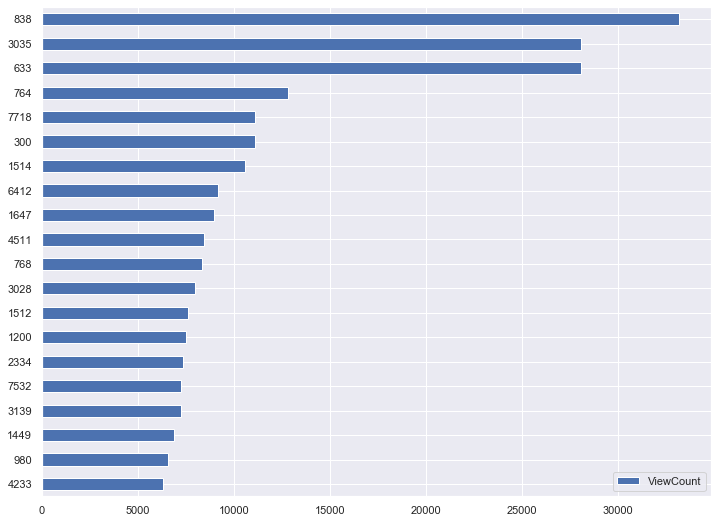

In [87]:
tag_views_sorted.plot(kind="barh", figsize=(12,9))

In [36]:
questions["ViewCount"]

0         21
1         25
2       1651
3         55
4         19
        ... 
8834      39
8835     113
8836     212
8837      22
8838     168
Name: ViewCount, Length: 8839, dtype: int64

We can transform it into a dataframe and plot.

In [21]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)

In [22]:
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


In [32]:
most_used_tags = tag_count.sort_values(by="Count").tail(20)
most_used_tags

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


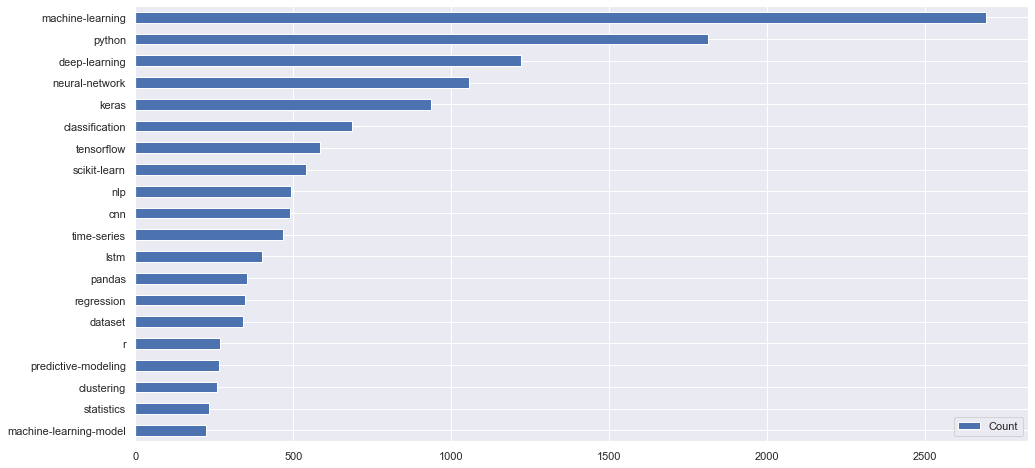

In [88]:
most_used_tags.plot(kind="barh", figsize=(16,8))

Some tags represent wide сconcepts. We can try the same with the views.

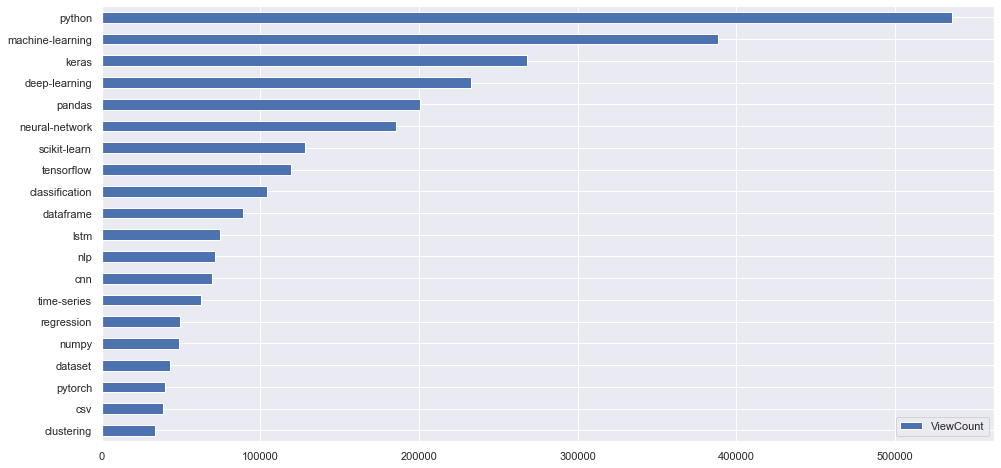

In [89]:
tag_view_count = dict()

for idx, tags in enumerate(questions["Tags"]):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += questions["ViewCount"].iloc[idx]
        else:
            tag_view_count[tag] = 1
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

Now let's compare them.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016A75E4F848>],
      dtype=object)

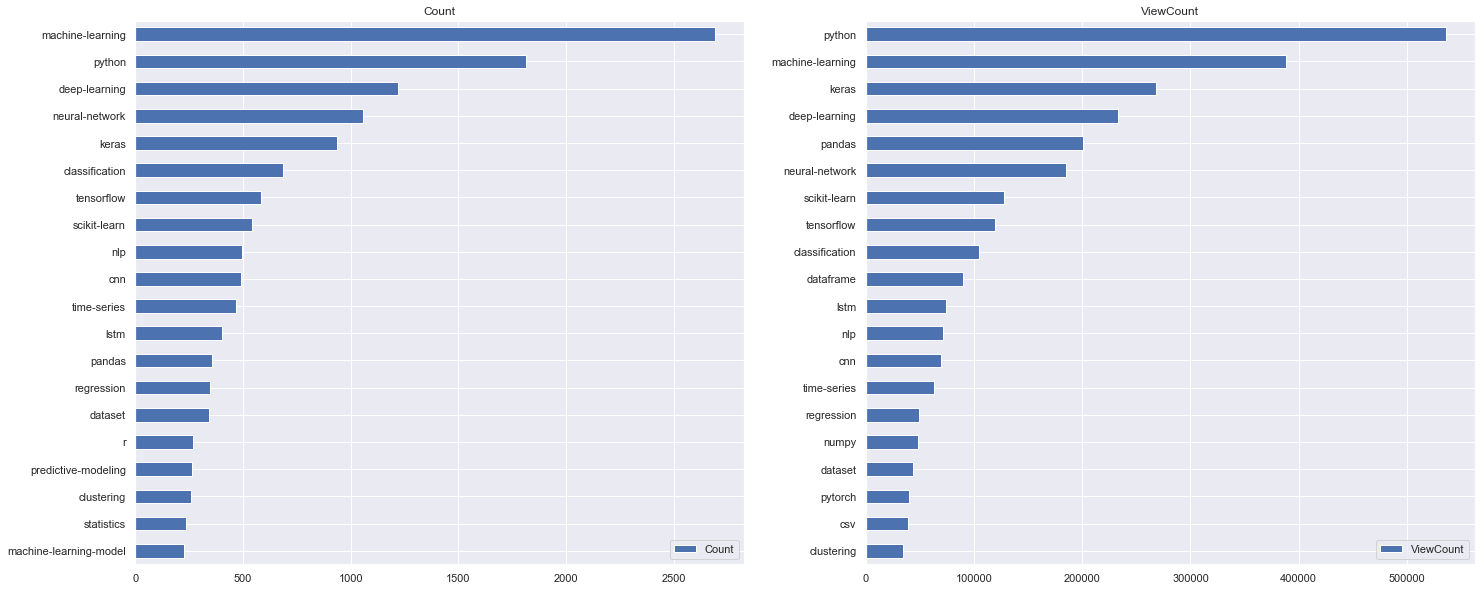

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used_tags.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

## Relations Between Tags 

We can get an understanding of how the tags are connected with each other by check how many times each pair of tags apears.

In [92]:
all_tags = list(tag_count.index)

In [93]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


Filling our dataframe with zeroes first will allow us to increment the intervening tags by one.

In [94]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

Let's focus on the most used tags in this case.

In [97]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


This gives us a table with data that represents how many times each tag is used with the other tags. For a better understanding we should visualize this table.

In [99]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

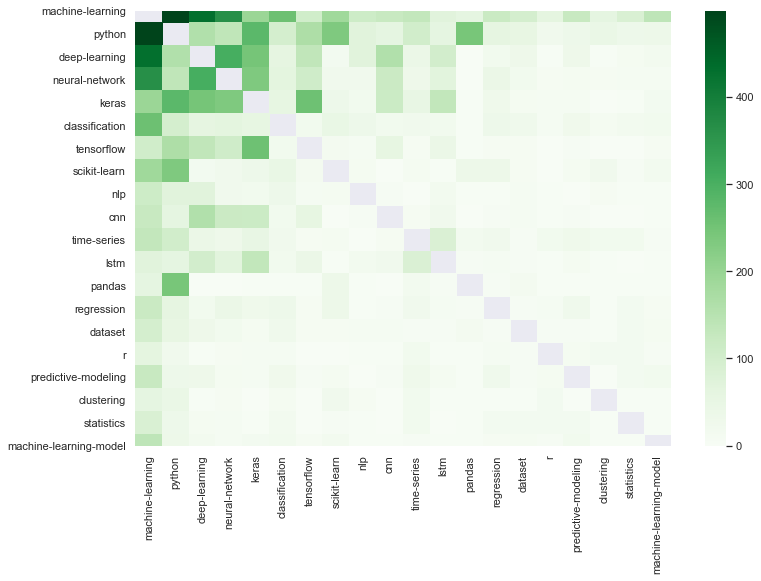

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags have the strongest correlation (top left corner). However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

## Enter Domain Knowledge

Tags **python**, **machine-learning**, **deep-learning**, **neural-network**, **keras**, **tensorflow**,  **classification**, **scikit-learn** represent techniques and Python libraries (**Keras**, **scikit-learn**, **TensorFlow**) for machine learning and its theme - deep learning. 

## Just a Fad

So is **deep learning** just a fad? We can get some more information if we work with all the question. We can get that by running the next query:

SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
 
Then we can analyze **deep learning** more.

In [111]:
all_q = pd.read_csv("all_q.csv", parse_dates=["CreationDate"])
all_q

,Id,CreationDate,Tags
0,52137,2019-05-17 21:54:15,<python><keras><prediction><evaluation>
1,52142,2019-05-17 23:11:13,<deep-learning><overfitting><regularization>
2,52144,2019-05-18 01:08:28,<machine-learning><neural-network>
3,52155,2019-05-18 11:03:04,<machine-learning><deep-learning><cnn>
4,52157,2019-05-18 13:13:32,<machine-learning><cost-function>
...,...,...,...
24358,66164,2020-01-09 08:11:04,<rnn>
24359,66165,2020-01-09 08:18:42,<deep-learning><nlp><data><stanford-nlp>
24360,66172,2020-01-09 09:05:23,<python><dataset><correlation><matrix>
24361,66174,2020-01-09 09:09:55,<classification><accuracy><binary>


In [112]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

In order to sort our tags with any connection to **deep learning** we need to think of a list that has all the tags related to **deep learning**. We can use the  list [**lstm**, **cnn**, **scikit-learn**, **tensorflow**, **keras**, **neural-network**, **deep-learning**]. A fucntion that marks the correlation will be handy.

In [113]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [114]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [115]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
20331,65469,2019-12-26 14:28:55,"[neural-network, distance]",1
3323,57469,2019-08-13 06:28:48,[ensemble-modeling],0
13754,68440,2020-02-21 06:22:04,"[python, pandas, data-cleaning, numpy]",0
3358,33538,2018-06-20 21:04:55,"[machine-learning, tensorflow, backpropagation]",1
7106,44274,2019-01-20 10:04:19,"[machine-learning, lstm, rnn, accuracy, metric]",1


The 2020 quarter data is not complete so we won't use it.

In [116]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Let's create a column that identifies the quarter in which a question was asked.

In [120]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,52137,2019-05-17 21:54:15,"[python, keras, prediction, evaluation]",1,19Q2
1,52142,2019-05-17 23:11:13,"[deep-learning, overfitting, regularization]",1,19Q2
2,52144,2019-05-18 01:08:28,"[machine-learning, neural-network]",1,19Q2
3,52155,2019-05-18 11:03:04,"[machine-learning, deep-learning, cnn]",1,19Q2
4,52157,2019-05-18 13:13:32,"[machine-learning, cost-function]",0,19Q2


Let's group our data by quarter and see how many **deep learning** questions each of them has.

In [122]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
15,18Q1,554,1219,0.454471
9,16Q3,161,584,0.275685
22,19Q4,804,2020,0.398020
8,16Q2,109,517,0.210832
19,19Q1,711,1762,0.403519


We can plot what we have now.

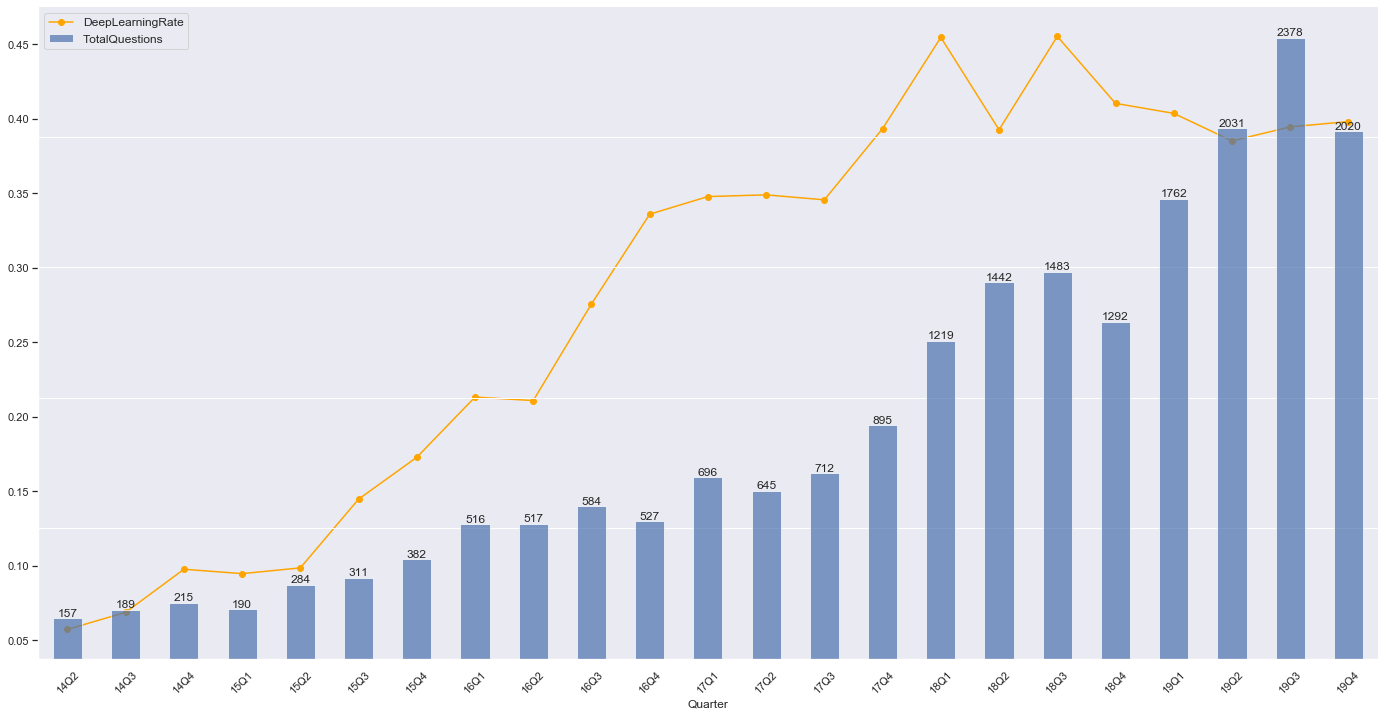

In [125]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Interesting that the number of qustions stopped growing as it already reached its maximum apparently. However we cannot state that the interest in **deep learning** is decreasing as it is still a popular topic which makes us conclude to keep creating this content.